# Import

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_file = pd.read_csv('wine.csv', header=None)
display(input_file.head())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1. 欄位0(Target)：紅酒的分類，共3類
2. 欄位1~13(Data)：各種紅酒中，各項化學成分檢驗結果，例如：酒精、頻果酸、鎂、黃酮、顏色強度、色澤等

# Preprocessing

In [27]:
X = input_file.iloc[:, 1:].values
y = input_file.iloc[:, 0].values
print(X.shape, y.shape)


(178, 13) (178,)


In [28]:
# Spliting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)


In [29]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Training

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

'''classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)'''

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

## Applying PCA

In [31]:
from sklearn.decomposition import PCA

pca_5 = PCA(n_components = 5)
X_train_5 = pca_5.fit_transform(X_train)
X_test_5 = pca_5.transform(X_test)

explained_variance_5 = pca_5.explained_variance_ratio_
print(explained_variance_5)


[0.35234328 0.19449176 0.1152444  0.07569375 0.06704594]


In [32]:
# Training the model with PCA
'''classifier_5 = DecisionTreeClassifier()
classifier_5.fit(X_train_5, y_train)'''

classifier_5 = LogisticRegression(random_state = 0)
classifier_5.fit(X_train_5, y_train)


LogisticRegression(random_state=0)

# Comparison

In [33]:
# Computing the accuracy of the classifier (計算分類器的精確度)

accuracy = classifier.score(X_test, y_test)
accuracy_5 = classifier_5.score(X_test_5, y_test)
print("Accuracy of the classifier =", round(accuracy, 4)*100, "%") # 小數點後第二位
print("Accuracy of the classifier with PCA =", round(accuracy_5, 4)*100, "%") # 小數點後第二位


Accuracy of the classifier = 100.0 %
Accuracy of the classifier with PCA = 93.33 %


In [34]:
# Comparing the results

X_test1 =[[1.51, 1.73, 1.98, 20.15, 85, 2.2, 1.92, .32, 1.48, 2.94, 1, 3.57, 172]]
X_test2 = [[14.23, 1.71, 2.43, 15.6, 127, 2.8, 3.06, .28, 2.29, 5.64, 1.04, 3.92, 1065]]
X_test3 = [[13.71, 5.65, 2.45, 20.5, 95, 1.68, .61, .52, 1.06, 7.7, .64, 1.74, 720]]


In [35]:
# The model without PCA

X_test1 = sc.transform(X_test1)
X_test2 = sc.transform(X_test2)
X_test3 = sc.transform(X_test3)

y_test1 = classifier.predict(X_test1)
y_test2 = classifier.predict(X_test2)
y_test3 = classifier.predict(X_test3)

print(y_test1, y_test2, y_test3)


[2] [1] [3]


In [36]:
# The model with PCA

X_test1_5 = pca_5.transform(X_test1)
X_test2_5 = pca_5.transform(X_test2)
X_test3_5 = pca_5.transform(X_test3)

y_test1_5 = classifier_5.predict(X_test1_5)
y_test2_5 = classifier_5.predict(X_test2_5)
y_test3_5 = classifier_5.predict(X_test3_5)

print(y_test1_5, y_test2_5, y_test3_5)


[2] [1] [3]


In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_5 = classifier_5.predict(X_test_5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_5 = confusion_matrix(y_test, y_pred_5)

print(cm)
print(cm_5)


[[19  0  0]
 [ 0 14  0]
 [ 0  0 12]]
[[18  1  0]
 [ 2 12  0]
 [ 0  0 12]]


# Visization

In [41]:
pca_2 = PCA(n_components = 2)
X_train_2 = pca_2.fit_transform(X_train)
X_test_2 = pca_2.transform(X_test)

explained_variance_2 = pca_2.explained_variance_ratio_
print(explained_variance_2)


[0.35234328 0.19449176]


In [42]:
classifier_2 = LogisticRegression(random_state = 0)
classifier_2.fit(X_train_2, y_train)

accuracy_2 = classifier_2.score(X_test_2, y_test)
print("Accuracy of the classifier =", round(accuracy, 4)*100, "%") # 小數點後第二位


Accuracy of the classifier = 100.0 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


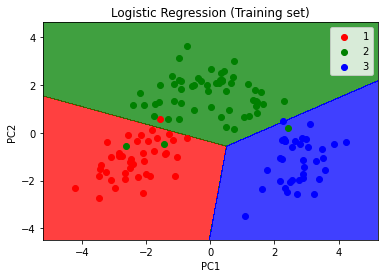

In [43]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_train_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


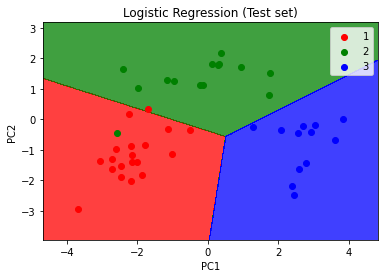

In [44]:
# Visualising the Test set results

X_set, y_set = X_test_2, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [45]:
X_test1_2 = pca_2.transform(X_test1)
X_test2_2 = pca_2.transform(X_test2)
X_test3_2 = pca_2.transform(X_test3)

y_test1 = classifier_2.predict(X_test1_2)
y_test2 = classifier_2.predict(X_test2_2)
y_test3 = classifier_2.predict(X_test3_2)

print(y_test1, y_test2, y_test3)


[2] [1] [3]
